In [1]:
import pandas_datareader.data as web
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from hmmlearn import hmm
import datetime





In [4]:
df1 = web.DataReader(['sp500'], 'fred', start = '2021-09-30',end='2022-09-29')
  
df2= web.DataReader(['VIXCLS'], 'fred', start = '2021-09-30',end='2022-09-29')
start_date = datetime.datetime(2021, 9, 1)
end_date=datetime.datetime(2022, 9, 29)
df3= web.DataReader('TSLA','stooq', start = start_date,end=end_date)
df4=pd.read_csv("/Users/devanshjoshi/Downloads/data_final.csv")
df5=df4.loc[:,['Date','Scaled_compound']]
df_=pd.concat([df1,df2,df3],axis=1)
df_.drop(['Open','High','Low','Volume'],axis=1,inplace=True)
df_=df_.dropna()
df_=df_.reset_index()
df_.rename(columns = {'index':'Date'}, inplace = True)
df_['Date']=pd.to_datetime(df_['Date'])
df5['Date']=pd.to_datetime(df5['Date'])
df= pd.merge(df_,df5, on='Date', how='inner')


# df['Sentiment']=df4['Scaled_compound']

# print(df.head())
# print(df.tail())

dates=df['Date']
x=df['Close']
x=x.to_numpy()


In [5]:
high=x[0]
low=x[0]
returns=[]
tmv=[]
threshold=0.01
time=0
up=0
down=0
dc=0
time_high=0
time_low=0
first_time=0
for i in range(1,len(x)):
    time=time+1
    if(up==0 and down==0):
        if(x[i]>=(1+threshold)*high):
            up=1
            down=0
            high=x[i]
            time_high=time
            first_time=time
        elif(x[i]<=(1-threshold)*low):
            down=1
            up=0
            low=x[i]
            time_low=time
            first_time=time
        else:
            pass
    elif(up==1 and dc==0):
        if(x[i]>=(1+threshold)*high):
            up=1
            down=0
            high=x[i]
            time_high=time
        elif(x[i]<=(1-threshold)*high):
            dc=1
            down=1
            up=0
            low=x[i]
            time_low=time
        else:
            pass
    elif(down==1 and dc==0):
        if(x[i]<=(1-threshold)*low):
            up=0
            down=1
            low=x[i]
            time_low=time
        elif(x[i]>=(1+threshold)*low):
            dc=1
            down=0
            up=1
            high=x[i]
            time_high=time
        else:
            pass
    elif(up==1 and dc==1):
        if(x[i]>=(1+threshold)*high):
            up=1
            down=0
            high=x[i]
            time_high=time
        elif(x[i]<=(1-threshold)*high):

            
            t_bw_trend=abs(time_high-time_low)
            r=[abs((low-high)/(low*t_bw_trend))]*t_bw_trend
            tm=[(high-low)/(low*threshold)]*t_bw_trend

            returns.extend(r)
            tmv.extend(tm)
            low=x[i]
            time_low=time
            up=0
            down=1
        else:
            pass
    elif(down==1 and dc==1):
        if(x[i]<=(1-threshold)*low):
            up=0
            down=1
            low=x[i]
            time_low=time
        elif(x[i]>=(1+threshold)*low):

            t_bw_trend=abs(time_high-time_low)
            r=[abs((low-high)/(high*t_bw_trend))]*t_bw_trend
            tm=[(low-high)/(high*threshold)]*t_bw_trend

            returns.extend(r)
            tmv.extend(tm)
            high=x[i]
            time_high=time
            up=1
            down=0
        else:
            pass
    else:
        pass
     
    
    
        

In [6]:
buffer_beginning=[returns[0]]*first_time
returns.extend(buffer_beginning)
buffer_end=[returns[len(returns)-1]]*(time-(len(returns)-1))
returns.extend(buffer_end)

returns=np.array(returns)

buffer_beginning=[tmv[0]]*first_time
tmv.extend(buffer_beginning)
buffer_end=[tmv[len(tmv)-1]]*(time-(len(tmv)-1))
tmv.extend(buffer_end)

tmv=np.array(tmv)


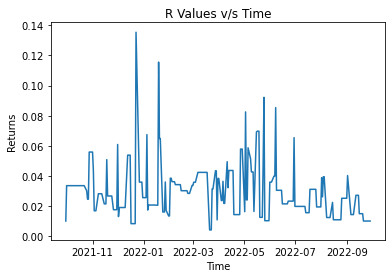

In [7]:

plt.figure()
plt.title('R Values v/s Time')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.plot(dates,returns)
plt.show()



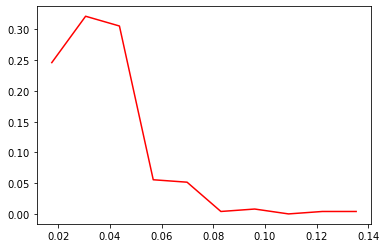

In [8]:
plt.figure()
count, bins_count = np.histogram(returns, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.show()

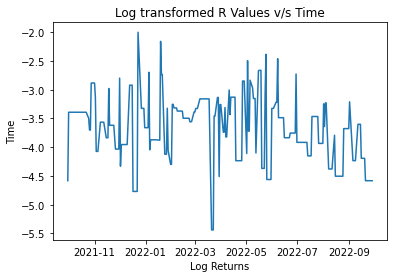

In [9]:

for i in range(len(returns)):
    returns[i]=math.log(returns[i])

plt.figure()
plt.title('Log transformed R Values v/s Time')
plt.xlabel('Log Returns')
plt.ylabel('Time')
plt.plot(dates,returns)
plt.show()
df['Returns']=returns
df['TMV']=tmv



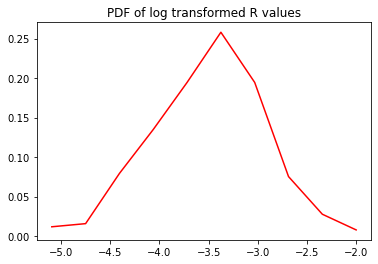

In [10]:
plt.figure()
count, bins_count = np.histogram(df["Returns"], bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.title('PDF of log transformed R values')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.show()

